# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [1]:
#import libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

(300, 2) (300,)


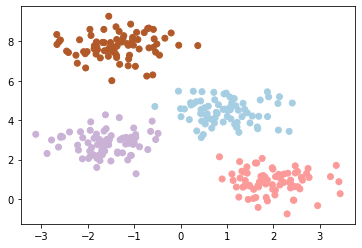

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers = 4, cluster_std=0.6, random_state=0)
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], c = y)


### Step 2: Create the helper functions
1. Implement ```square_diff``` that takes in two vectors ```x1``` and ```x2``` and returns their squared difference. Hint: Use ```assert``` to check their lenghts match.
2. Implement ```root_sum_squared``` that takes in a vector of squaerd differences and returns the square root of the summed elements.
3. Implement ```euclidean_distances``` that takes in feature and prediction vectors and computes the distances. *Hint:* ```np.linalg.norm```
4. Implement ```evaluate``` that takes in ```y_hat``` and ```y_true``` (classifications of the blobs)and returns the accruacy of the KNN predict function.

In [3]:
from knn_scratch import KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/6, random_state = 0)

#HAVE A LOOK to knn_scratch.py for the code


### Step 3: Create the KNN prediction function
The KNN prediction function as the following steps
1. For each row in ```X``` calcuate the euclidian distance of each row to the target vector.
2. Combine the distances array with the target classifers array y.
3. Sort the array and select the k lowest pairs and get the categorical values of the k nearest and put in a list
4. Count the highest votes and update the highest voted class to y_hat

In [4]:
knn = KNN(4)
knn.fit(X_train = X_train, Y_train= y_train)
y_pred = knn.predict(X_test)
print(y_pred)



[0, 1, 0, 1, 2, 2, 0, 2, 3, 3, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 2, 0, 3, 1, 2, 2, 1, 2, 3, 0, 3, 2, 3, 1, 2, 0, 2]


In [5]:
predictions = knn.predict(X_test)

In [6]:
print('Accuracy {:0.2f}%'.format(100*knn.score(predictions, y_test)))

Accuracy 100.00%


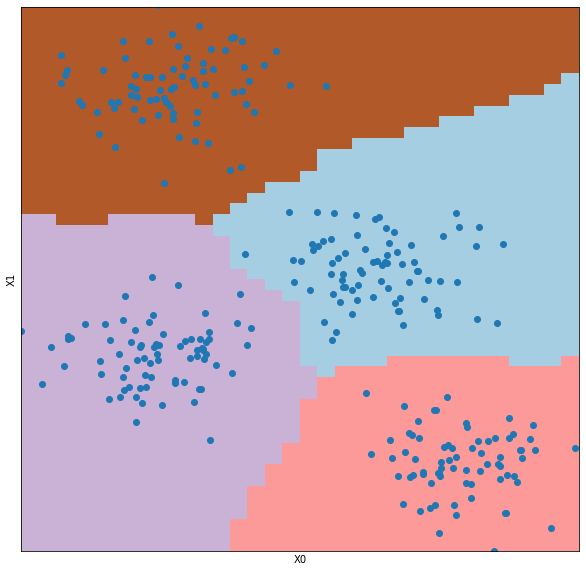

In [12]:
h = 0.2
x_min, x_max = X[:,0].min() , X[:,0].max() 
y_min, y_max = X[:,1].min() , X[:,1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.array(knn.predict(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X0')
plt.ylabel('X1')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()